In [3]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from glob import glob

In [6]:
WACCM_path = '/Volumes/WACCM/DataSorted/2004-02-20/*.nc'

WACCM_files = []

if len(glob(WACCM_path)) == 1:
    WACCM_files = [netCDF4.Dataset(glob(WACCM_path)[0])]
elif len(glob(WACCM_path)) > 1:
    for file in glob(WACCM_path):
        WACCM_files.append(netCDF4.Dataset(glob(file)[0]))

f = WACCM_files[0]

H = 7
p0 = 1013.25
k = 1.38*10**(-23) # J/K
z = lambda p : - H * np.log(p/p0)
def Ne_convert(e: float,P: float,T: float) -> float:
    """Convert electron concentration to density

    Args:
        e (float): Mixing ratio
        P (float): Pressure
        T (float): Temperature

    Returns:
        float: Electron density
    """
    return e*P/(k*T)

In [25]:
#print(f.variables.keys())
lat = f['instr_lat']
lon = f['instr_lon']
num = f['instr_num']
date = f['obs_date']
time = f['obs_time']
lev = f['lev']
Ne = f['e']
T = f['T']
lev_mask = lev[:] < 0.01
H = (- 700 * np.log(lev[lev_mask]/1013.25)).astype(int)/100

print(((H[:-1]-H[1:])*10).astype(int)/10)
print(H)

[3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 2.2]
[132.65 129.15 125.65 122.15 118.65 115.15 111.65 108.15 104.65 101.15
 97.65 94.15 90.65 87.13 83.63 81.36]


In [9]:
mask_tromso = (lat[:] > 69.5) & (lat[:] < 69.7)
mask_svalbard = (lat[:] > 78.8) & (lat[:] < 79.0)


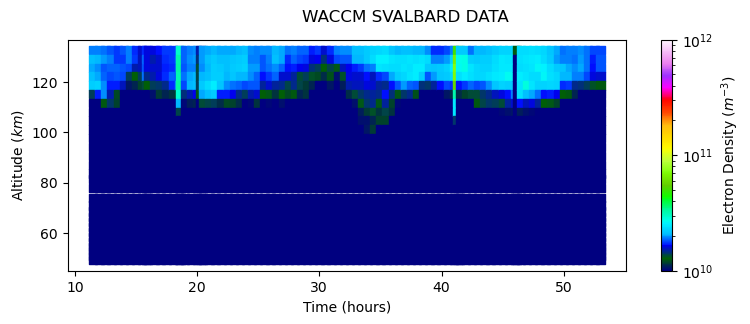

In [10]:
lev_mask = lev[:] < 1
P = lev[lev_mask]
h = z(P)
Ne_svalbard = []
for array in Ne[mask_svalbard]:
    Ne_svalbard.append(array[lev_mask])

Ne_svalbard = np.array(Ne_svalbard)
hours = time[mask_svalbard]/3600

mask_hours = [hours[i] > hours[i+1] for i in range(len(hours)-1)]
indices = [i+1 for i, value in enumerate(mask_hours) if value]

for indice in indices:
    hours[indice:] = hours[indice:] + 24

fig, ax = plt.subplots(figsize=(9, 3))

i = 0
for hour in hours:
    sc = ax.scatter(np.repeat(hour, len(h)), h, c = Ne_convert(Ne_svalbard[i],P*100,T[i][lev_mask]), cmap='gist_ncar', norm=LogNorm(vmin=10e9, vmax=10e11),marker = 's')
    i += 1

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r'Electron Density ($m^{-3}$)')
ax.set_ylabel(r'Altitude ($km$)')
ax.set_xlabel(r'Time (hours)')
fig.suptitle('WACCM SVALBARD DATA' + '\n' )
plt.show()